## Observations and Insights

%matplotlib notebook

## Dependencies and starter code

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [71]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
by_regimen_df = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
by_regimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [167]:
count_regimen_df = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().to_frame().reset_index()
count_regimen_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


## Bar plots

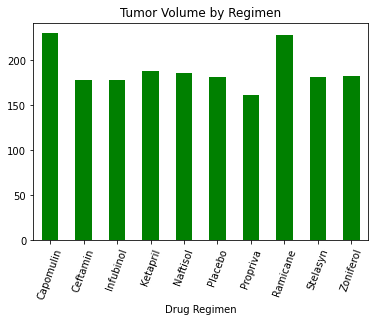

In [149]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().plot(kind='bar', y='Tumor Volume (mm3)', rot=70, color='green', title="Tumor Volume by Regimen")

Text(0, 0.5, 'Tumor Volume (mm3)')

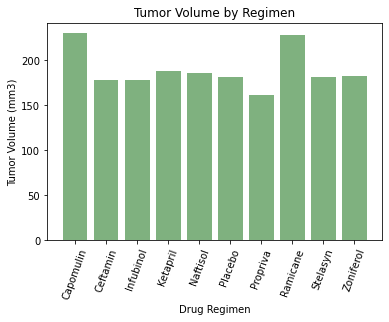

In [153]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(count_regimen_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, count_regimen_df['Tumor Volume (mm3)'], color='darkgreen', alpha=.5, align="center")
plt.xticks(tick_locations, count_regimen_df['Drug Regimen'], rotation=70)
plt.title("Tumor Volume by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

## Pie plots

In [120]:
sex_df = combined_df.groupby('Sex')['Sex'].count()
print(sex_df)

Sex
Female    935
Male      958
Name: Sex, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D462B68408>],
      dtype=object)

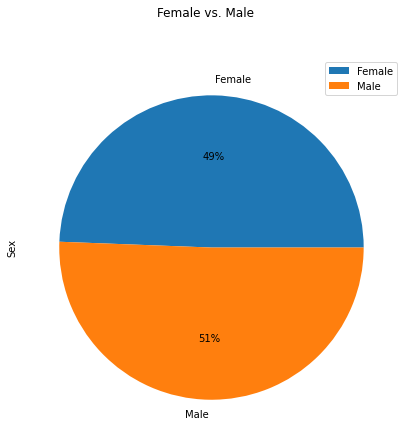

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df.plot.pie(figsize=(7,7), subplots=True, title=("Female vs. Male"), legend=True, autopct='%.0f%%')

No handles with labels found to put in legend.


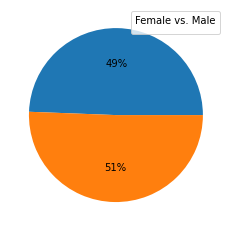

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df, autopct='%.0f%%')
plt.legend(loc = 'upper right', title="Female vs. Male")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen